In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# glcm_0_df = pd.read_csv('glcm_0.csv', sep='\t').sample(frac=1)
# glcm_45_df = pd.read_csv('glcm_45.csv', sep='\t').sample(frac=1)
# glcm_90_df = pd.read_csv('glcm_90.csv', sep='\t').sample(frac=1)
# glcm_135_df = pd.read_csv('glcm_135.csv', sep='\t').sample(frac=1)
# glcm_complex_df = pd.read_csv('glcm_complex.csv', sep='\t').sample(frac=1)
# glcm_complex_duplex_df = pd.read_csv('glcm_complex_duplex.csv', sep='\t').sample(frac=1)

# all_datasets = [glcm_0_df, glcm_45_df, glcm_45_df, glcm_135_df, glcm_complex_df, glcm_complex_duplex_df]
# df_names = ['glcm_0_df', 'glcm_45_df', 'glcm_45_df', 'glcm_135_df', 'glcm_complex_df', 'glcm_complex_duplex_df']
# glcm_complex_duplex_df.head()

FileNotFoundError: File b'glcm_0.csv' does not exist

In [17]:
glrlm_0 = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0)
features = ['LGRE', 'HGRE', 'GLNU']
target = 'isPatho'
print(glrlm_0[glrlm_0['isPatho'] == 0].describe())
print(glrlm_0[glrlm_0['isPatho'] == 1].describe())
# glrlm_0
# glrlm_0[glrlm_0['isPatho'] == 1].head()

            LGRE           HGRE          GLNU  isPatho
count  68.000000      68.000000  6.800000e+01     68.0
mean    0.081835  278005.347822  7.292784e+05      0.0
std     0.229991  180681.437362  1.256571e+06      0.0
min     0.003565   21259.616438  4.018700e+04      0.0
25%     0.008833  137200.937500  1.569180e+05      0.0
50%     0.013741  259152.485683  3.433185e+05      0.0
75%     0.030736  437916.274769  7.026090e+05      0.0
max     1.734077  628420.925000  6.964542e+06      0.0
           LGRE           HGRE          GLNU  isPatho
count  5.000000       5.000000  5.000000e+00      5.0
mean   0.030683  432830.636644  3.526043e+06      1.0
std    0.023022  132870.158785  1.998928e+06      0.0
min    0.011307  310664.273109  1.574498e+06      1.0
25%    0.013078  345425.337349  2.049271e+06      1.0
50%    0.020693  355413.257310  3.326268e+06      1.0
75%    0.043405  555363.241379  4.041619e+06      1.0
max    0.064933  597287.074074  6.638557e+06      1.0


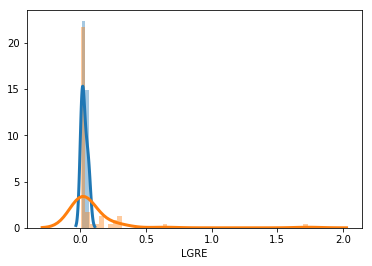

In [20]:
p = glrlm_0[glrlm_0['isPatho'] == 1]
n = glrlm_0[glrlm_0['isPatho'] == 0]

sns.distplot(p['LGRE'], norm_hist=True, kde_kws={'linewidth': 3})
sns.distplot(n['LGRE'], norm_hist=True, kde_kws={'linewidth': 3})

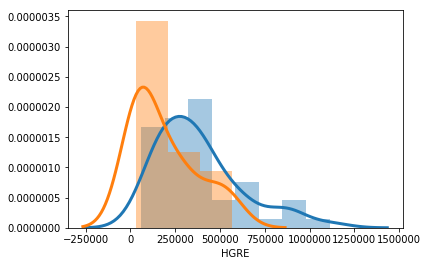

In [17]:
sns.distplot(p['HGRE'], norm_hist=True, kde_kws={'linewidth': 3})
sns.distplot(n['HGRE'], norm_hist=True, kde_kws={'linewidth': 3})

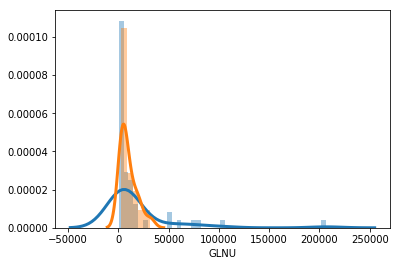

In [19]:
sns.distplot(p['GLNU'], norm_hist=True, kde_kws={'linewidth': 3})
sns.distplot(n['GLNU'], norm_hist=True, kde_kws={'linewidth': 3})

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


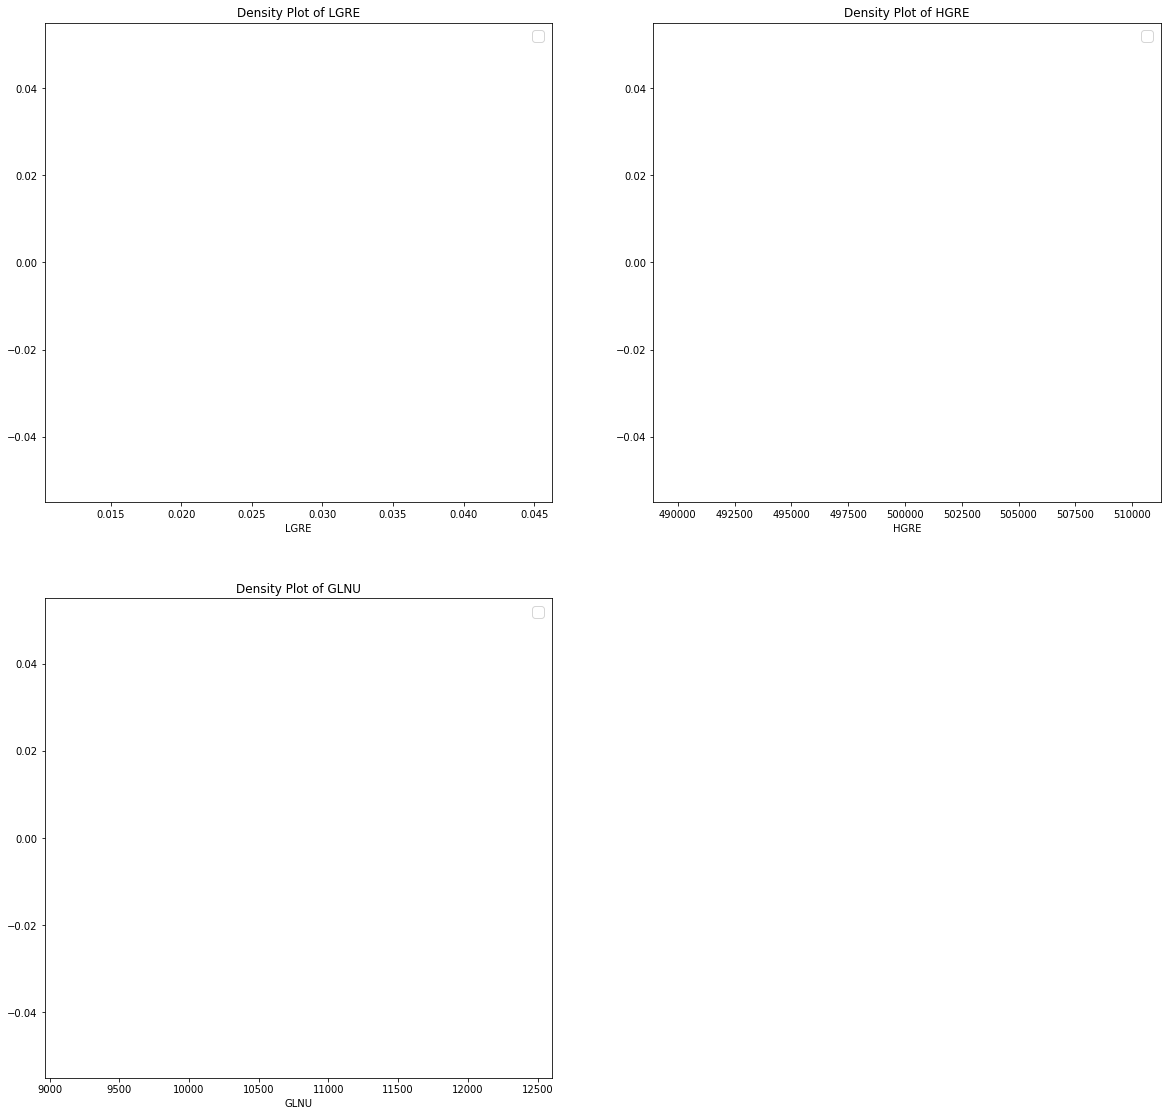

In [9]:
density_plot(glrlm_0, features, target)

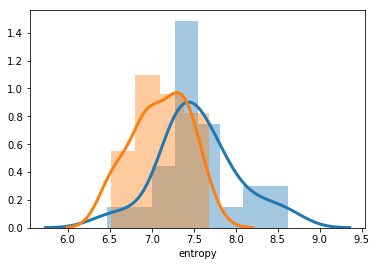

In [22]:
patho = glcm_complex_duplex_df[glcm_complex_duplex_df['pathology'] == 1]
norma = glcm_complex_duplex_df[glcm_complex_duplex_df['pathology'] == 0]
sns.distplot(patho['entropy'], kde=True, kde_kws={'linewidth': 3})
sns.distplot(norma['entropy'], kde=True, kde_kws={'linewidth': 3})

In [8]:
def visualize_pairplot(df):
    no_name_df = df[1:]
    sns.pairplot(
        no_name_df,
        kind='reg',
        hue='pathology',
        plot_kws={
            'line_kws':{'color':'red'},
                'scatter_kws': {'alpha': 0.1}
        },
        diag_kind='hist')

In [8]:
def density_plot(df, features, target):
    plt.rcParams["figure.figsize"] = (20, 30)
#     features = ['energy', 'contrast', 'homogenity', 'correlation', 'variance', 'entropy']
#     if feature not in features:
#         print("Wrong feature")
#         print("Choose from: ", features)

    patho = df[df[target] == 1]
    norma = df[df[target] == 0]
    
    for (i, f) in enumerate(features):
        plt.subplot(3, 2, i + 1)
        sns.distplot(patho[f], hist=False, kde=False, kde_kws={'shade': True, 'linewidth': 3}, label='pathology')
        sns.distplot(norma[f], hist=False, kde=False, kde_kws={'shade': True, 'linewidth': 3}, label='norma')
        plt.title('Density Plot of ' + f)
        plt.legend(prop={'size': 15})
        
    plt.show()

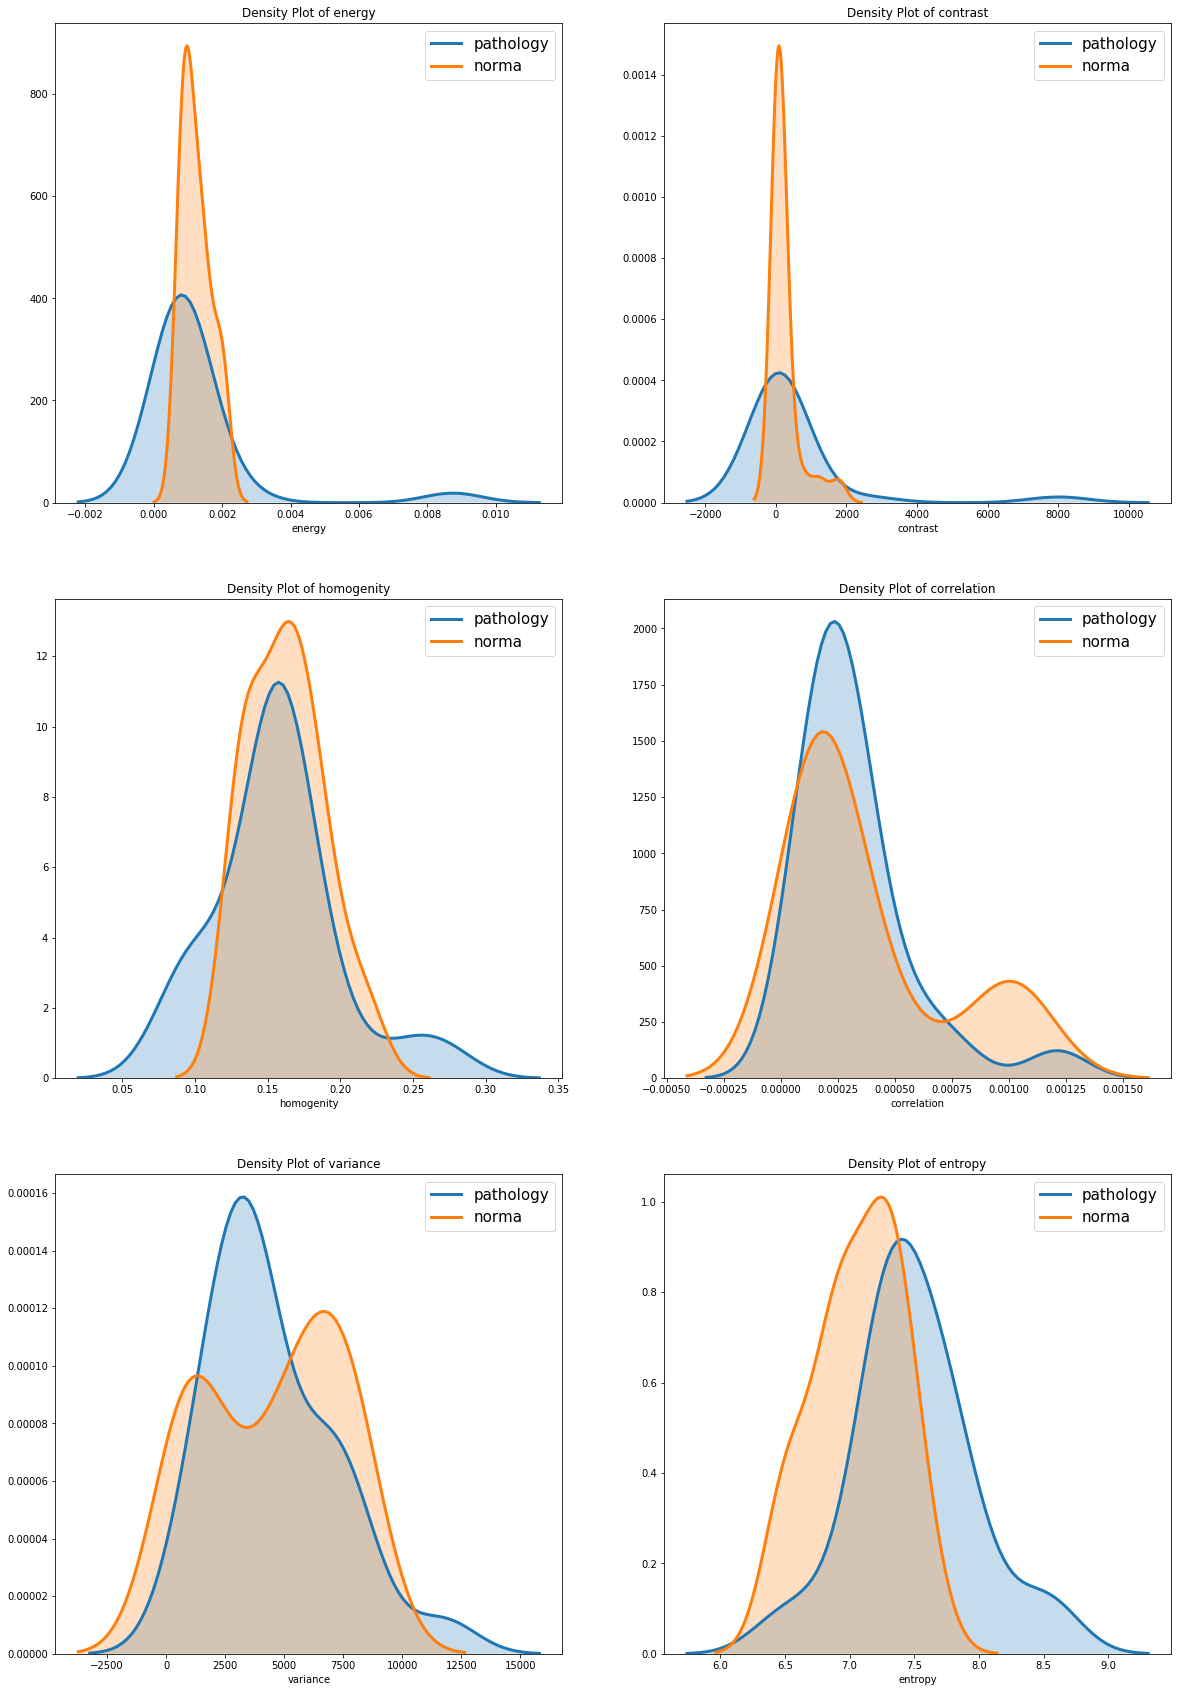

In [62]:
density_plot(glcm_complex_df)

In [35]:
glrlm_0 = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)
print(glrlm_0.head())
features = ['LGRE', 'HGRE', 'GLNU']

target = 'isPatho'

        LGRE           HGRE        GLNU  isPatho
32  0.013495  436923.768421   1133075.0      0.0
78  0.156066  412595.227273  10098895.0      1.0
18  0.013083  344859.836735    276475.0      0.0
13  0.013987  571967.780488    290996.0      0.0
87  0.007525  890848.818182    209105.0      1.0


In [35]:
p = glrlm_0[glrlm_0['isPatho'] == 1]
n = glrlm_0[glrlm_0['isPatho'] == 0]

In [28]:
glrlm_0.groupby('isPatho')[features].agg([np.mean, np.std])

LGRE                     HGRE                         GLNU  \
             mean       std           mean            std          mean   
isPatho                                                                   
0.0      0.081835  0.229991  278005.347822  180681.437362  7.292784e+05   
1.0      0.032267  0.042557  379772.090821  236849.726517  3.738260e+06   

                       
                  std  
isPatho                
0.0      1.256571e+06  
1.0      1.067174e+07

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


def get_data(df, features):
#     no_name = df.loc[:, df.columns != 'name']
#     no_name = no_name.loc[:, features]
    print(df.head())
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
#     print(y)
    patho = df.loc[y == 1]
    norma = df.loc[y == 1]
    
    X_train = X[:int(len(X)/2)]
    X_test = X[int(len(X)/2):]
    
    y_train = y[:int(len(y)/2)]
    y_test = y[int(len(y)/2):]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_data(glrlm_0, features)

# print(glrlm_0)
# model = LogisticRegression()
# polynomial_features = PolynomialFeatures(degree=2)

# x_poly = polynomial_features.fit_transform(X_train)

def logistic_regression(df, features):
    X_train, X_test, y_train, y_test = get_data(df, features)
    
#     print(y_test)
    model = LogisticRegression(
        random_state=0,
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=200
    )
    
    model.fit(X_train, y_train)
    predicted_classes = model.predict(X_test)
    accuracy = accuracy_score(y_test, predicted_classes)
    return accuracy

acc = logistic_regression(glrlm_0, features)
print('Accuracy: ', int(acc * 100), '%')

         LGRE           HGRE       GLNU  isPatho
87   0.007525  890848.818182   209105.0      1.0
98   0.011730  322982.220000   175305.0      1.0
76   0.069507  335901.630435  7125761.0      1.0
23   0.006160  150387.236364    74910.0      0.0
101  0.008646  243676.619048    74892.0      1.0
         LGRE           HGRE       GLNU  isPatho
87   0.007525  890848.818182   209105.0      1.0
98   0.011730  322982.220000   175305.0      1.0
76   0.069507  335901.630435  7125761.0      1.0
23   0.006160  150387.236364    74910.0      0.0
101  0.008646  243676.619048    74892.0      1.0
Accuracy:  55 %


In [48]:
from sklearn import svm
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
dataset = dataset[dataset['isPatho'] <= 2]
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
svc = svm.SVC(gamma='scale', decision_function_shape='ovo')
svc.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


In [61]:
from sklearn import svm
import pandas as pd



dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
X = dataset.iloc[:, :-1]
print(X)
Y = dataset.iloc[:, -1]
seed = 123
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

print(X_train)

clf = svm.SVC(kernel='linear', gamma='scale', C=1000, cache_size=7000)
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

         LGRE           HGRE        GLNU
91   0.043241  133709.271277   4180265.0
77   0.200032   30606.153005   3235737.0
59   0.090852   39725.066116   1069852.0
29   0.018356  574444.547170    595614.0
1    0.003565  208144.250000     52337.0
2    0.009372  405387.321429     48593.0
101  0.347688  379786.127517  15339708.0
31   0.015090  498549.169811   1396446.0
9    0.006580  175357.390625    125701.0
96   0.039231  302413.956522   2644713.0
87   0.034206  515944.902439   5352616.0
52   0.280428   40767.912281    651115.0
22   0.015687  169473.979167    108727.0
18   0.013083  344859.836735    276475.0
20   0.012568  141070.083333     80152.0
98   0.026333   80608.874317   1233306.0
35   0.024209  290170.754717    341541.0
49   1.734077   31968.972603   6964542.0
41   0.067959   44852.065574    197520.0
86   0.010760  341457.066265   1320194.0
60   0.025314  226535.660377    944823.0
43   0.042877   60550.682927     79151.0
72   0.011307  345425.337349   1574498.0
74   0.030463  1

In [159]:
from sklearn import svm
dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
# dataset = dataset.loc[(dataset['isPatho'] == 0) | (dataset['isPatho'] == 1) | (dataset['isPatho'] == 4)]
# print(dataset)
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
seed = 123
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.05%


In [24]:
print(clf.coef_)
print(len(dataset[dataset['isPatho'] == 1]))
print(len(dataset[dataset['isPatho'] == 0]))
print(5.0/68)

[[-0.13865376  0.10793199  0.2755272 ]]
5
68
0.07352941176470588


[[0.5985531  0.85373169 1.         0.        ]
 [0.03301861 0.156125   0.09375345 0.        ]
 [0.17502849 0.         0.48718252 0.        ]
 [0.         0.12127808 0.         0.        ]
 [1.         1.         0.34592212 0.        ]]
[[-0.13865376  0.10793199  0.2755272 ]]


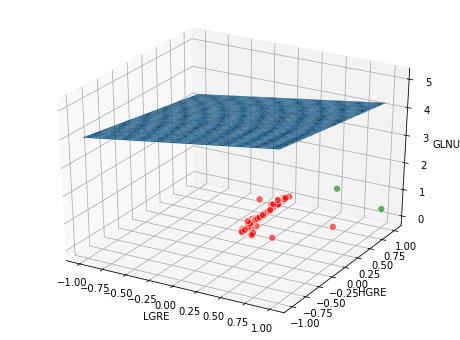

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')


glrlm_0 = dataset

p = glrlm_0[glrlm_0['isPatho'] == 1]
n = glrlm_0[glrlm_0['isPatho'] == 0]

X = dataset.iloc[:, :-1]
# print(X)
Y = dataset.iloc[:, -1]

svc = clf

# min_max_scaler = MinMaxScaler()
# p = min_max_scaler.fit_transform(p)
# n = min_max_scaler.fit_transform(n)

print(p)

# lgre_scaling = MinMaxScaler(feature_range=(-1, 1)).fit(glrlm_0['LGRE'])

# hgre_scaling = MinMaxScaler(feature_range=(-1, 1)).fit(glrlm_0['HGRE'])
# glnu_scaling = MinMaxScaler(feature_range=(-1, 1)).fit(glrlm_0['GLNU'])

# scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)

# p = scaling.transform(p)

# p_xs = p['LGRE']
# p_ys = p['HGRE']
# p_zs = p['GLNU']

# n_xs = n['LGRE']
# n_ys = n['HGRE']
# n_zs = n['GLNU']

p_xs = p[:, 0]
p_ys = p[:, 1]
p_zs = p[:, 2]

n_xs = n[:, 0]
n_ys = n[:, 1]
n_zs = n[:, 2]

print(svc.coef_)

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-1, 1, 100)
x, y = np.meshgrid(tmp, tmp)

ax.plot_surface(x, y, z(x,y))
ax.scatter(p_xs, p_ys, p_zs, s=50, alpha=0.6, edgecolors='w', c='g')
ax.scatter(n_xs, n_ys, n_zs, s=50, alpha=0.6, edgecolors='w', c='r')





ax.set_xlabel('LGRE')
ax.set_ylabel('HGRE')
ax.set_zlabel('GLNU')
plt.show()